In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

2022-09-05 16:39:54.066140: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-05 16:39:54.066171: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/manh/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
image_array = cv2.imread("Dataset/Face_Mask/00000_Mask.jpg")

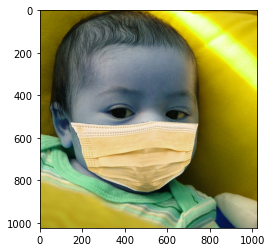

In [3]:
plt.imshow(image_array)

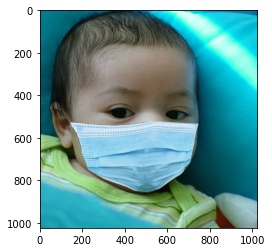

In [4]:
plt.imshow(cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB))

In [5]:
image_array.shape

(1024, 1024, 3)

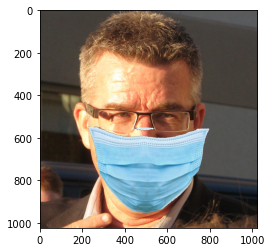

In [6]:
data_directory = "Dataset/"
classes = ['Face_Mask', 'No_Mask']
for category in classes:
    path = os.path.join(data_directory, category)
    for image in os.listdir(path):
        image_array = cv2.imread(os.path.join(path, image))
        plt.imshow(cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

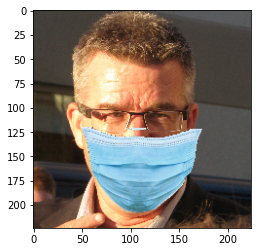

In [7]:
image_size = (224, 224)
new_array = cv2.resize(image_array, image_size)
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

## Reading the images and converting all to array

In [8]:
training_data = []
def create_training_data():
    for category in classes:
        path = os.path.join(data_directory, category)
        class_number = classes.index(category)
        for image in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path, image))
                new_array = cv2.resize(image_array, image_size)
                training_data.append([new_array, class_number])
            except Exception as ex:
                print(ex)

In [9]:
create_training_data()

In [10]:
len(training_data)

1950

In [11]:
import random
random.shuffle(training_data)

In [12]:
X = []
y = []

for feature, label in training_data:
    X.append(feature)
    y.append(label)
    
X = np.array(X).reshape(-1, image_size[0], image_size[1], 3)

In [13]:
X.shape

(1950, 224, 224, 3)

In [14]:
X = X / 255.0

In [15]:
y = np.array(y)

In [16]:
y.shape

(1950,)

## Deep Learning Model for Training - Transfer Learning

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
model = tf.keras.applications.mobilenet.MobileNet()

2022-09-05 16:43:15.392920: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/manh/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-09-05 16:43:15.393047: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-05 16:43:15.393140: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (manh-HP-Pavilion-Notebook): /proc/driver/nvidia/version does not exist
2022-09-05 16:43:15.417766: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


17225924/17225924 [==============================] - 6s 0us/step


In [20]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

## Transfer Learning - Tuning, weights will start from last check point

In [21]:
base_input = model.layers[0].input

In [22]:
base_output = model.layers[-4].output

In [26]:
flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [27]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [28]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

## Setting for binary classification

In [30]:
new_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [31]:
new_model.fit(X, y, epochs = 1, validation_split = 0.1)

2022-09-05 16:54:11.230982: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1056706560 exceeds 10% of free system memory.
2022-09-05 16:55:09.926375: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 51380224 exceeds 10% of free system memory.
2022-09-05 16:55:11.638719: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 51380224 exceeds 10% of free system memory.
2022-09-05 16:55:11.741129: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 51380224 exceeds 10% of free system memory.
2022-09-05 16:55:11.871683: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 51380224 exceeds 10% of free system memory.


55/55 [==============================] - 276s 5s/step - loss: 0.0358 - accuracy: 0.9880 - val_loss: 1.1660 - val_accuracy: 0.8051


In [35]:
for layer in model.layers[0: -3]:
    layer.trainable = False

In [36]:
new_model.save('my_model.h5')

In [37]:
new_model = tf.keras.models.load_model('my_model.h5')

## Checking the network for predictions

In [38]:
image_array = cv2.imread("Dataset/Face_Mask/00002_Mask.jpg")

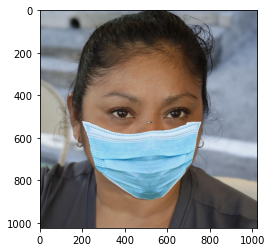

In [41]:
plt.imshow(cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB))

In [43]:
final_image = cv2.resize(image_array, image_size)
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image / 255.0

In [44]:
predict = new_model.predict(final_image)

1/1 [==============================] - 4s 4s/step


In [45]:
predict

array([[0.05762314]], dtype=float32)

## Checking the network for unknown image

In [50]:
unknown_image = cv2.imread('Dataset/sad_woman_face.jpg')

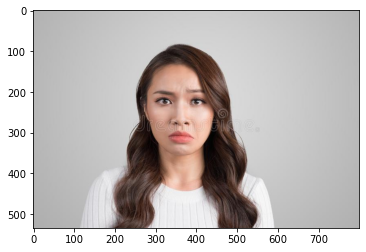

In [51]:
plt.imshow(cv2.cvtColor(unknown_image, cv2.COLOR_RGB2BGR))